# Scalable Models Of Probabilistic Forecasting For Fuzzy Time Series - Experiments of Chapter 6


<center>
<table><tr>
  
  <td> <a href="http://ufmg.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ufmg.jpg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
  <td> <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
  <td> <a href="http://www.minds.eng.ufmg.br/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/minds_logo_medium.jpeg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 
</tr>
</table>
</center>


* **Author**: Petrônio Cândido de  Lima e Silva  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (SILVA, P.C.L)
* **Advisor**: Frederico Gadelha Guimarães <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-9238-8839" href="https://orcid.org/0000-0001-9238-8839" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (GUIMARÃES, F. G)
* **Co-Advisor**: Hossein Javedani Sadaei  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-0848-9280" href="https://orcid.org/0000-0002-0848-9280" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (SADAEI, H. J.)

This notebook is part of [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.3374641.svg)](https://doi.org/10.5281/zenodo.3374641). You can execute it on-line with the Google Colab tool at http://bit.ly/scalable_probabilistic_fts_chap6

In case you have any questions, do not hesitate in contact us using the following e-mail: petronio.candido@ifnmg.edu.br

<center>
<table><tr>
  
  <td>Powered by </td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td><a href="https://pyfts.github.io/pyFTS/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/logo_medium.png" alt="pyFTS - Fuzzy Time Series for Python" width="100"/></a></td>
</tr>
</table>
</center>



## Library Installation

In [0]:
# Requirements: Python 3.6
# The command below install the exact version of pyFTS library employed in the experiments
!pip3 install -U git+git://github.com/PYFTS/pyFTS.git@0b03fbfa57ff361248a5eb4e69e5e1b2d3fb4e48 
!git clone https://github.com/petroniocandido/stac

  Cloning git://github.com/PYFTS/pyFTS.git (to revision 0b03fbfa57ff361248a5eb4e69e5e1b2d3fb4e48) to /tmp/pip-req-build-c1uc7rmv
  Running command git clone -q git://github.com/PYFTS/pyFTS.git /tmp/pip-req-build-c1uc7rmv
  Stored in directory: /tmp/pip-ephem-wheel-cache-3ad1aufs/wheels/23/58/20/caad547064ed831a65331f9b3f8242954e489a6272d633bca6
Successfully built pyFTS
fatal: destination path 'stac' already exists and is not an empty directory.


## Common Imports

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [0]:
from pyFTS.models.multivariate import mvfts, wmvfts, cmvfts, grid, granular
from pyFTS.benchmarks import benchmarks as bchmk, Measures
from pyFTS.common import Util as cUtil
from pyFTS.models import pwfts
from pyFTS.models.seasonal import partitioner as seasonal
from pyFTS.models.seasonal.common import DateTime

from pyFTS.models.multivariate import common, variable, mvfts
from pyFTS.partitioners import Grid
from pyFTS.common import Membership

## Experiments database import

The execution of the experiments is a computationally expensive and  time consuming task. In case you don't want to repeat the whole batch of experiments, just download the experiment database.

In [0]:
!wget -O experiments.db.gz https://github.com/petroniocandido/PhdThesis/raw/master/experiments/experiments.db.gz
!gunzip experiments.db.gz

--2019-08-01 15:17:18--  https://github.com/petroniocandido/PhdThesis/raw/master/experiments/experiments.db.gz
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/petroniocandido/PhdThesis/master/experiments/experiments.db.gz [following]
--2019-08-01 15:17:18--  https://raw.githubusercontent.com/petroniocandido/PhdThesis/master/experiments/experiments.db.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3793135 (3.6M) [application/octet-stream]
Saving to: ‘experiments.db.gz’

experiments.db.gz   100%[===================>]   3.62M  --.-KB/s    in 0.1s    

2019-08-01 15:17:19 (32.9 MB/s) - ‘experimen

## Datasets

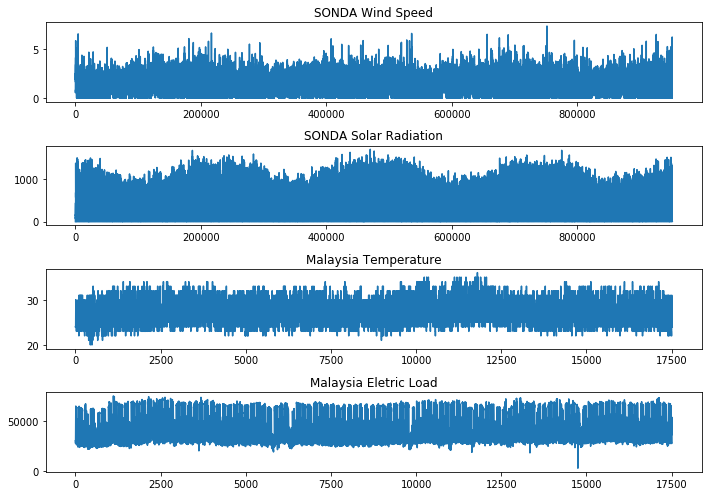

In [0]:
from pyFTS.data import SONDA, Malaysia

ds_shortnames = {
    'SONDA.glo_avg': 'Solar Rad.',
    'SONDA.ws_10m': 'Wind Sp.',
    'Malaysia.temperature': 'Temp.',
    'Malaysia.load': 'Load'
}

ds_longnames = {
    'SONDA.glo_avg': 'SONDA Solar Radiation',
    'SONDA.ws_10m': 'SONDA Wind Speed',
    'Malaysia.temperature': 'Malaysia Temperature',
    'Malaysia.load': 'Malaysia Eletric Load'
}

datasets = {}


sonda = SONDA.get_dataframe()[['datahora','glo_avg','ws_10m']]

sonda = sonda.drop(sonda.index[np.where(sonda["ws_10m"] <= 0.01)])
sonda = sonda.drop(sonda.index[np.where(sonda["glo_avg"] <= 0.01)])
sonda = sonda.dropna()


malaysia = Malaysia.get_dataframe()

datasets['SONDA.ws_10m'] = sonda["ws_10m"].values
datasets['SONDA.glo_avg'] = sonda["glo_avg"].values
datasets['Malaysia.temperature'] = malaysia["temperature"].values
datasets['Malaysia.load'] = malaysia["load"].values

fig, ax = plt.subplots(nrows=4, ncols=1,figsize=[10,7])

for ct, (dataset_name, dataset) in enumerate(datasets.items()):
  ax[ct].plot(dataset)
  ax[ct].set_title(ds_longnames[dataset_name])

plt.tight_layout()


## Experiments

### Batch execution for the monovariate methods

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [0]:
windows = [600000, 600000, 10000, 10000]

for ct, (dataset_name, dataset) in enumerate(datasets.items()):
    bchmk.sliding_window_benchmarks2(dataset, windows[ct], train=0.9, inc=0.25,
                                     methods=[hofts.HighOrderFTS, hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS],
                                     benchmark_models=False,
                                     transformations=[None],
                                     orders=[2],
                                     partitions=[50],
                                     progress=False, type='point',
                                     distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                     file="experiments.db", dataset=dataset_name,
                                     tag="experiments")

for ct, (dataset_name, dataset) in enumerate(datasets.items()):
    bchmk.sliding_window_benchmarks2(dataset, windows[ct], train=0.9, inc=0.25,
                                     methods=[ensemble.SimpleEnsembleFTS, ifts.IntervalFTS,
                                              ifts.WeightedIntervalFTS, pwfts.ProbabilisticWeightedFTS],
                                     methods_parameters=[{'partitions': [45, 50, 55], 'alpha':.05},
                                                         {},{},{}],
                                     benchmark_models=False,
                                     transformations=[None],
                                     orders=[2],
                                     partitions=[50],
                                     progress=False, type='interval',
                                     distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                     file="experiments.db", dataset=dataset_name,
                                     tag="experiments")

for ct, (dataset_name, dataset) in enumerate(datasets.items()):
    bchmk.sliding_window_benchmarks2(dataset, windows[ct], train=0.9, inc=0.25,
                                     methods=[ensemble.SimpleEnsembleFTS, pwfts.ProbabilisticWeightedFTS],
                                     methods_parameters=[{'partitions':[45,50,55]}, {}],
                                     benchmark_models=False,
                                     transformations=[None],
                                     orders=[2],
                                     partitions=[50],
                                     progress=False, type='distribution',
                                     distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                     file="experiments.db", dataset=dataset_name,
                                     tag="experiments")


### Batch execution for the multivariate methods

#### SONDA Solar

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [0]:

sp1 = {'seasonality': DateTime.minute_of_day, 'names': [str(k)+'hs' for k in range(0,24)]}
sp2 = {'seasonality': DateTime.day_of_year, 'names': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']}

variables = {
    "Hour": dict(data_label="datahora", partitioner=seasonal.TimeGridPartitioner, npart=24,
                          partitioner_specific=sp1, alpha_cut=.3),
    "Month": dict(data_label="datahora", partitioner=seasonal.TimeGridPartitioner, npart=12,
                          partitioner_specific=sp2, alpha_cut=.3),
    "SolarRadiation": dict(data_label="glo_avg", alias='rad',
                         partitioner=Grid.GridPartitioner, npart=5, func=Membership.gaussmf,
                         alpha_cut=.25)
}

methods = [mvfts.MVFTS, wmvfts.WeightedMVFTS, granular.GranularWMVFTS]

parameters = [
    {},{},
    dict(fts_method=pwfts.ProbabilisticWeightedFTS, fuzzyfy_mode='both',
                order=1, knn=3)
]

bchmk.multivariate_sliding_window_benchmarks2(df, 10000, train=0.9, inc=0.25,
                                              methods=methods,
                                              methods_parameters=parameters,
                                              variables=variables,
                                              target_variable='SolarRadiation',
                                              type='point',
                                              steps_ahead=[1],
                                              distributed=False,
                                              nodes=['192.168.0.110', '192.168.0.107', '192.168.0.106'],
                                              file="experiments.db", dataset='SONDA.solar',
                                              tag="experiments"
                                              )

bchmk.multivariate_sliding_window_benchmarks2(df, 10000, train=0.9, inc=0.25,
                                              methods=methods,
                                              methods_parameters=parameters,
                                              variables=variables,
                                              target_variable='SolarRadiation',
                                              type='interval',
                                              steps_ahead=[1],
                                              distributed=False,
                                              nodes=['192.168.0.110', '192.168.0.107', '192.168.0.106'],
                                              file="experiments.db", dataset='SONDA.solar',
                                              tag="experiments"
                                              )

methods = [granular.GranularWMVFTS]

parameters = [
    dict(fts_method=pwfts.ProbabilisticWeightedFTS, fuzzyfy_mode='both',
                order=1, knn=3)
]


bchmk.multivariate_sliding_window_benchmarks2(df, 10000, train=0.9, inc=0.25,
                                              methods=methods,
                                              methods_parameters=parameters,
                                              variables=variables,
                                              target_variable='SolarRadiation',
                                              type='distribution',
                                              steps_ahead=[1],
                                              distributed=False,
                                              nodes=['192.168.0.110', '192.168.0.107', '192.168.0.106'],
                                              file="experiments.db", dataset='SONDA.solar',
                                              tag="experiments"
                                              )

#### SONDA Wind Speed

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [0]:
sp = {'seasonality': DateTime.day_of_year, 'names': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']}

variables = {
    "Month": dict(data_label="datahora", partitioner=seasonal.TimeGridPartitioner, npart=12,
                          partitioner_specific=sp, alpha_cut=.3),
    "WindSpeed": dict(data_label="ws_10m", alias='wind',
                         partitioner=Grid.GridPartitioner, npart=15, func=Membership.gaussmf,
                         alpha_cut=.25)
}

methods = [mvfts.MVFTS, wmvfts.WeightedMVFTS, granular.GranularWMVFTS]

parameters = [
    {},{},
    dict(fts_method=pwfts.ProbabilisticWeightedFTS, fuzzyfy_mode='both',
                order=3, knn=2)
]

bchmk.multivariate_sliding_window_benchmarks2(df, 10000, train=0.9, inc=0.25,
                                              methods=methods,
                                              methods_parameters=parameters,
                                              variables=variables,
                                              target_variable='WindSpeed',
                                              type='point',
                                              steps_ahead=[1],
                                              distributed=False,
                                              nodes=['192.168.0.110', '192.168.0.107', '192.168.0.106'],
                                              file="experiments.db", dataset='SONDA.wind',
                                              tag="experiments"
                                              )

bchmk.multivariate_sliding_window_benchmarks2(df, 10000, train=0.9, inc=0.25,
                                              methods=methods,
                                              methods_parameters=parameters,
                                              variables=variables,
                                              target_variable='WindSpeed',
                                              type='interval',
                                              steps_ahead=[1],
                                              distributed=False,
                                              nodes=['192.168.0.110', '192.168.0.107', '192.168.0.106'],
                                              file="experiments.db", dataset='SONDA.wind',
                                              tag="experiments"
                                              )

methods = [granular.GranularWMVFTS]
parameters = [
    dict(fts_method=pwfts.ProbabilisticWeightedFTS, fuzzyfy_mode='both',
                order=3, knn=2)
]


bchmk.multivariate_sliding_window_benchmarks2(df, 10000, train=0.9, inc=0.25,
                                              methods=methods,
                                              methods_parameters=parameters,
                                              variables=variables,
                                              target_variable='WindSpeed',
                                              type='distribution',
                                              steps_ahead=[1],
                                              distributed=False,
                                              nodes=['192.168.0.110', '192.168.0.107', '192.168.0.106'],
                                              file="experiments.db", dataset='SONDA.wind',
                                              tag="experiments"
                                              )

#### Malaysia Temperature

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [0]:
sp = {'seasonality': DateTime.minute_of_day, 'names': [str(k)+'hs' for k in range(0,24)]}

variables = {
    "Hour": dict(data_label="time", partitioner=seasonal.TimeGridPartitioner, npart=24,
                          partitioner_specific=sp, alpha_cut=.3),
    "Temperature": dict(data_label="temperature", alias='temp',
                        partitioner=Grid.GridPartitioner, npart=10, func=Membership.gaussmf,
                        alpha_cut=.25),
    "Load": dict(data_label="load", alias='load',
                         partitioner=Grid.GridPartitioner, npart=10, func=Membership.gaussmf,
                         alpha_cut=.25)
}

methods = [mvfts.MVFTS, wmvfts.WeightedMVFTS, granular.GranularWMVFTS]

parameters = [
    {},{},
    dict(fts_method=pwfts.ProbabilisticWeightedFTS, fuzzyfy_mode='both',
                order=1, knn=1)
]

bchmk.multivariate_sliding_window_benchmarks2(df, 10000, train=0.9, inc=0.25,
                                              methods=methods,
                                              methods_parameters=parameters,
                                              variables=variables,
                                              target_variable='Load',
                                              type='point',
                                              steps_ahead=[1],
                                              file="experiments.db", dataset='Malaysia',
                                              tag="experiments"
                                              )

bchmk.multivariate_sliding_window_benchmarks2(df, 10000, train=0.9, inc=0.25,
                                              methods=methods,
                                              methods_parameters=parameters,
                                              variables=variables,
                                              target_variable='Load',
                                              type='interval',
                                              steps_ahead=[1],
                                              file="experiments.db", dataset='Malaysia',
                                              tag="experiments"
                                              )

methods = [granular.GranularWMVFTS]

parameters = [
    dict(fts_method=pwfts.ProbabilisticWeightedFTS, fuzzyfy_mode='both',
                order=1, knn=1)
]

bchmk.multivariate_sliding_window_benchmarks2(df, 10000, train=0.9, inc=0.25,
                                              methods=methods,
                                              methods_parameters=parameters,
                                              variables=variables,
                                              target_variable='Load',
                                              type='distribution',
                                              steps_ahead=[1],
                                              file="experiments.db", dataset='Malaysia',
                                              tag="experiments"
                                              )



### Analysis

#### Point Forecasting

In [0]:
from pyFTS.benchmarks import Util as bUtil

rmse = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'experiments' and Dataset in ('SONDA.ws_10m','SONDA.glo_avg','Malaysia.temperature','Malaysia.load') and measure = 'rmse'")

rmse.head()


,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,288823,2019-06-20 03:53:52,SONDA.ws_10m,experiments,point,HOFTS,,2,Grid,50.0,1104,1,None,rmse,0.38
1,288826,2019-06-20 03:53:52,SONDA.ws_10m,experiments,point,WHOFTS,,2,Grid,50.0,1104,1,None,rmse,0.33
2,288829,2019-06-20 03:53:57,SONDA.ws_10m,experiments,point,PWFTS,,2,Grid,50.0,1104,1,None,rmse,0.33
3,288832,2019-06-20 03:54:06,SONDA.ws_10m,experiments,point,HOFTS,,2,Grid,50.0,1221,1,None,rmse,0.45
4,288835,2019-06-20 03:54:07,SONDA.ws_10m,experiments,point,WHOFTS,,2,Grid,50.0,1221,1,None,rmse,0.43


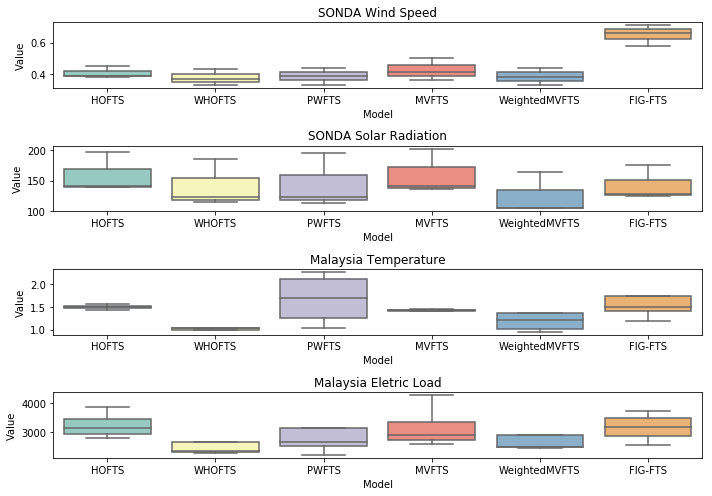

In [0]:
import seaborn as sns

datasets = rmse['Dataset'].unique()

fig, ax = plt.subplots(nrows=len(datasets), ncols=1, figsize=[10,7])

for cm, dataset in enumerate(datasets):
  
  df = rmse[(rmse['Dataset']==dataset)]

  g1 = sns.boxplot(x='Model', y='Value', data=df, showfliers=False, 
                   ax=ax[cm], 
                   palette="Set3")
  ax[cm].set_title(ds_longnames[dataset])
  
plt.tight_layout()

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

_filter = "Dataset in ('SONDA.ws_10m','SONDA.glo_avg','Malaysia.temperature','Malaysia.load')"

df = bUtil.simple_synthetic_dataframe("experiments.db", "experiments", "rmse", _filter)
tests = Tests.format_experiment_table(df,csv=False, std=False,
        exclude=['.25', '(1,0,0)','(2,0,0)','(2)'], 
                 replace={'ARIMA(1,0,1)-0.05': 'ARIMA',
                         'QAR(1)-0.5':'QAR',
                          'kNN(1)-0.05':'kNN',
                         'EnsembleFTS-.05': 'EnsembleFTS',
                         'BSTS(1,0,1)-0.05': 'BSTS'})

#print(tests.to_latex())
tests

,dataset,WHOFTS,WeightedMVFTS,PWFTS,HOFTS,MVFTS,FIG-FTS
0,SONDA.ws_10m,0.377,0.383,0.387,0.407,0.423,0.650
1,Malaysia.temperature,0.990,1.185,1.675,1.495,1.408,1.648
2,SONDA.glo_avg,141.183,124.797,144.597,159.147,159.597,142.133
3,Malaysia.load,2584.348,2863.755,3004.237,3244.543,3161.308,3153.607


#### Interval Forecasting

In [0]:
from pyFTS.benchmarks import Util as bUtil

wk05 = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'experiments' and Dataset in ('SONDA.ws_10m','SONDA.glo_avg','Malaysia.temperature','Malaysia.load') and measure = 'winkler05'")
wk25 = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'experiments' and Dataset in ('SONDA.ws_10m','SONDA.glo_avg','Malaysia.temperature','Malaysia.load') and measure = 'winkler25'")

wk05.head()


,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,288993,2019-06-20 03:59:33,SONDA.ws_10m,experiments,interval,EnsembleFTS-hofts,,2,,50.0,0,1,None,winkler05,9.26
1,289003,2019-06-20 03:59:33,SONDA.ws_10m,experiments,interval,IFTS,,2,Grid,50.0,1104,1,None,winkler05,2.31
2,289013,2019-06-20 03:59:33,SONDA.ws_10m,experiments,interval,WIFTS,,2,Grid,50.0,1104,1,None,winkler05,7.31
3,289023,2019-06-20 03:59:33,SONDA.ws_10m,experiments,interval,PWFTS,,2,Grid,50.0,1104,1,None,winkler05,7.34
4,289033,2019-06-20 04:00:38,SONDA.ws_10m,experiments,interval,EnsembleFTS-hofts,,2,,50.0,0,1,None,winkler05,11.94


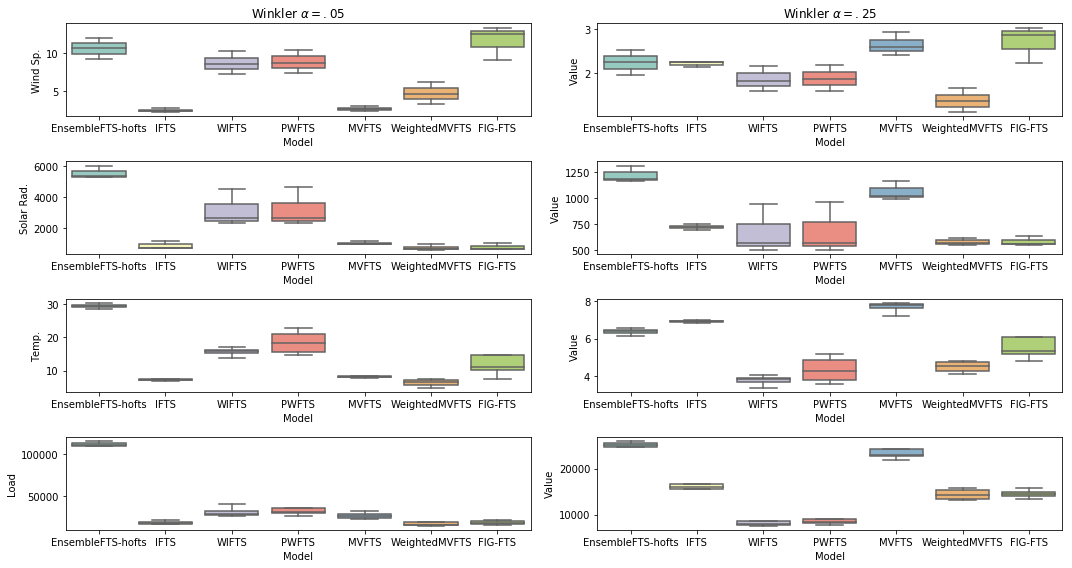

In [0]:
import seaborn as sns

datasets = wk25['Dataset'].unique()

fig, ax = plt.subplots(nrows=len(datasets), ncols=2, figsize=[15,8])

for ct, dataset in enumerate(datasets):
  df1 = wk05[(wk05['Dataset']==dataset)]
  df2 = wk25[(wk25['Dataset']==dataset)]
  g1 = sns.boxplot(x='Model', y='Value', data=df1, showfliers=False, 
                     ax=ax[ct][0], 
                     palette="Set3")
  g1 = sns.boxplot(x='Model', y='Value', data=df2, showfliers=False, 
                     ax=ax[ct][1], 
                     palette="Set3")
  
  ax[ct][0].set_ylabel(ds_shortnames[dataset])
  
ax[0][0].set_title('Winkler $\\alpha=.05$')
ax[0][1].set_title('Winkler $\\alpha=.25$')
plt.tight_layout()

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

_filter = "Dataset in ('SONDA.ws_10m','SONDA.glo_avg','Malaysia.temperature','Malaysia.load')"

df = bUtil.simple_synthetic_dataframe("experiments.db", "experiments", "winkler05", _filter)
tests = Tests.format_experiment_table(df,csv=False, std=False,
        exclude=['.25', '(1,0,0)','(2,0,0)','(2)'], 
                 replace={'ARIMA(1,0,1)-0.05': 'ARIMA',
                         'QAR(1)-0.5':'QAR',
                          'kNN(1)-0.05':'kNN',
                         'EnsembleFTS-.05': 'EnsembleFTS',
                         'BSTS(1,0,1)-0.05': 'BSTS'})

#print(tests.to_latex())
tests

,dataset,IFTS,MVFTS,WeightedMVFTS,WIFTS,PWFTS,EnsembleFTS-hofts,FIG-FTS
0,SONDA.ws_10m,2.503,2.713,4.74,8.667,8.820,10.593,11.603
1,Malaysia.temperature,7.328,8.200,6.38,15.630,18.445,29.318,13.708
2,SONDA.glo_avg,911.853,1063.537,771.90,3158.217,3194.867,5545.537,799.960
3,Malaysia.load,18141.510,26221.122,17403.36,30910.323,33750.325,112076.810,17932.175


#### Probabilistic Forecasting

In [0]:
from pyFTS.benchmarks import Util as bUtil

crps = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'experiments' and Dataset in ('SONDA.ws_10m','SONDA.glo_avg','Malaysia.temperature','Malaysia.load') and measure = 'crps'")

crps.head()


,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,289705,2019-06-20 04:12:05,SONDA.ws_10m,experiments,density,EnsembleFTS-hofts,,2,,50.0,0,1,None,crps,30.174
1,289708,2019-06-20 04:13:00,SONDA.ws_10m,experiments,density,PWFTS,,2,Grid,50.0,1104,1,None,crps,4.110
2,289711,2019-06-20 04:13:00,SONDA.ws_10m,experiments,density,EnsembleFTS-hofts,,2,,50.0,0,1,None,crps,96.638
3,289714,2019-06-20 04:16:04,SONDA.ws_10m,experiments,density,PWFTS,,2,Grid,50.0,1221,1,None,crps,6.045
4,289717,2019-06-20 04:16:04,SONDA.ws_10m,experiments,density,EnsembleFTS-hofts,,2,,50.0,0,1,None,crps,65.716


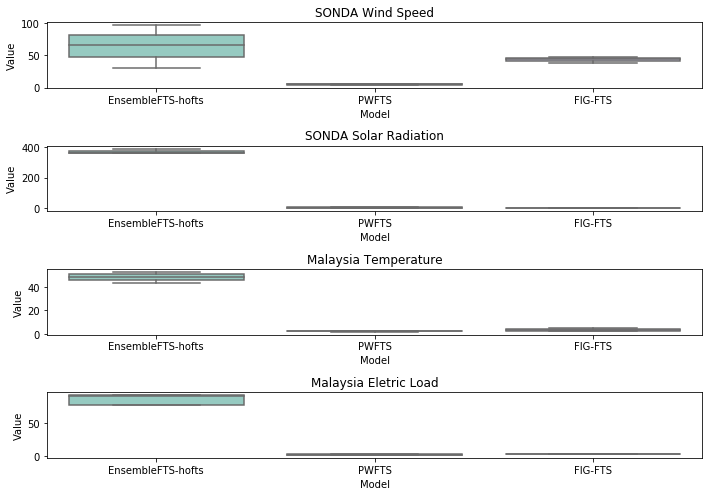

In [0]:
import seaborn as sns

datasets = crps['Dataset'].unique()

fig, ax = plt.subplots(nrows=len(datasets), ncols=1, figsize=[10,7])

for cm, dataset in enumerate(datasets):
  
  df = crps[(crps['Dataset']==dataset)]

  g1 = sns.boxplot(x='Model', y='Value', data=df, showfliers=False, 
                   ax=ax[cm], 
                   palette="Set3")
  ax[cm].set_title(ds_longnames[dataset])
  
plt.tight_layout()

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

_filter = "Dataset in ('SONDA.ws_10m','SONDA.glo_avg','Malaysia.temperature','Malaysia.load') and measure = 'crps'"

df = bUtil.simple_synthetic_dataframe("experiments.db", "experiments", "crps", _filter)
tests = Tests.format_experiment_table(df,csv=False, std=False,
        exclude=['.25', '(1,0,0)','(2,0,0)','(2)'], 
                 replace={'ARIMA(1,0,1)-0.05': 'ARIMA',
                         'QAR(1)-0.5':'QAR',
                          'kNN(1)-0.05':'kNN',
                         'EnsembleFTS-.05': 'EnsembleFTS',
                         'BSTS(1,0,1)-0.05': 'BSTS'})

#print(tests.to_latex())
tests

,dataset,PWFTS,FIG-FTS,EnsembleFTS-hofts
0,Malaysia.load,1.819,2.189,78.165
1,Malaysia.temperature,2.451,3.554,48.276
2,SONDA.glo_avg,5.341,3.172,368.514
3,SONDA.ws_10m,5.016,43.509,64.176


## Residual Analysis

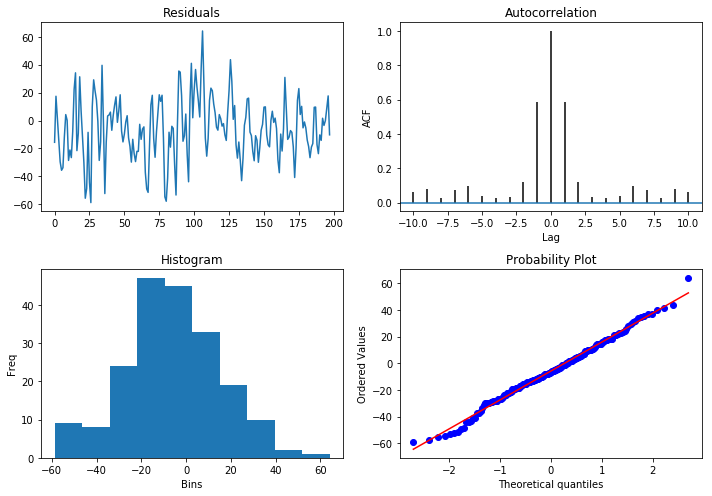

,Lag,Statistic,p-Value,Critical Value,Result
0,1,61.935542,3.552714e-15,3.841459,H0 accepted
1,2,62.518764,2.653433e-14,5.991465,H0 accepted
2,3,62.834903,1.456613e-13,7.814728,H0 accepted


In [0]:
from pyFTS.data import TAIEX, NASDAQ, SP500

train = datasets['SP500'][2000:2800]
test = datasets['SP500'][2800:3000]

fs = Grid.GridPartitioner(data=train, npart=55)
    
model1 = hofts.HighOrderFTS(partitioner=fs, order=1)
model1.fit(train)
forecasts = model1.predict(test)
res = ResidualAnalysis.residuals(test, forecasts, order=model1.order + 1)

ResidualAnalysis.single_plot_residuals(res,order=1)
ResidualAnalysis.ljung_box_test(res,alpha=0.05)



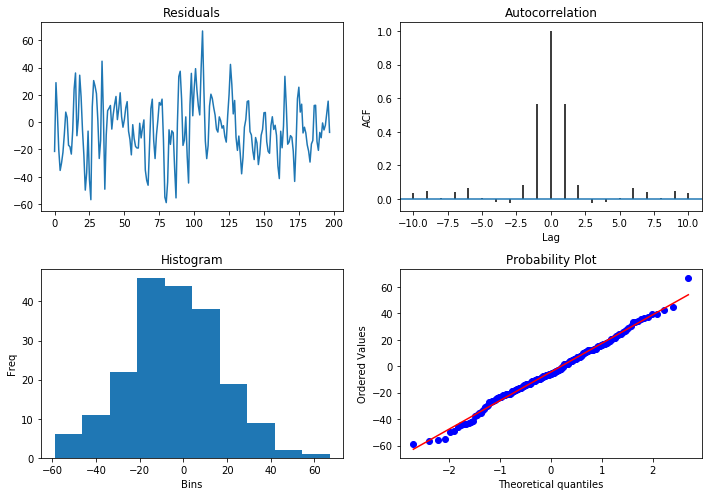

In [0]:
from pyFTS.data import TAIEX, NASDAQ, SP500

train = datasets['SP500'][2000:2800]
test = datasets['SP500'][2800:3000]

fs = Grid.GridPartitioner(data=train, npart=55)
    
model1 = hofts.WeightedHighOrderFTS(partitioner=fs, order=1)
model1.fit(train)
forecasts = model1.predict(test)
res = ResidualAnalysis.residuals(test, forecasts, order=model1.order + 1)

ResidualAnalysis.single_plot_residuals(res,order=1)


In [0]:
ljung_box_test = ResidualAnalysis.ljung_box_test(res,alpha=0.05)
print(lbt.to_latex())

\begin{tabular}{lrrrrl}
\toprule
{} &  Lag &  Statistic &       p-Value &  Critical Value &       Result \\
\midrule
0 &    1 &  60.821810 &  6.217249e-15 &        3.841459 &  H0 accepted \\
1 &    2 &  61.161621 &  5.240253e-14 &        5.991465 &  H0 accepted \\
2 &    3 &  62.075286 &  2.117195e-13 &        7.814728 &  H0 accepted \\
\bottomrule
\end{tabular}



In [0]:
from pyFTS.common import Util as cUtil
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import ResidualAnalysis


res1 = {}
res2 = {}

for dataset_name, dataset in datasets.items():
  res1[dataset_name] = []
  res2[dataset_name] = []
  for ct, train, test in cUtil.sliding_window(dataset, 1000, .9, inc=.5):
    
    fs = Grid.GridPartitioner(data=train, npart=35)
    
    model1 = hofts.HighOrderFTS(partitioner=fs, order=1)
    model1.fit(train)
    forecasts = model1.predict(test)
    res1[dataset_name].extend(
        ResidualAnalysis.residuals(test, forecasts, order=model1.order + 1)
    )
    
    model2 = hofts.WeightedHighOrderFTS(partitioner=fs, order=1)
    model2.fit(train)
    forecasts = model2.predict(test)
    res2[dataset_name].extend(
        ResidualAnalysis.residuals(test, forecasts, order=model2.order + 1)
    )
    

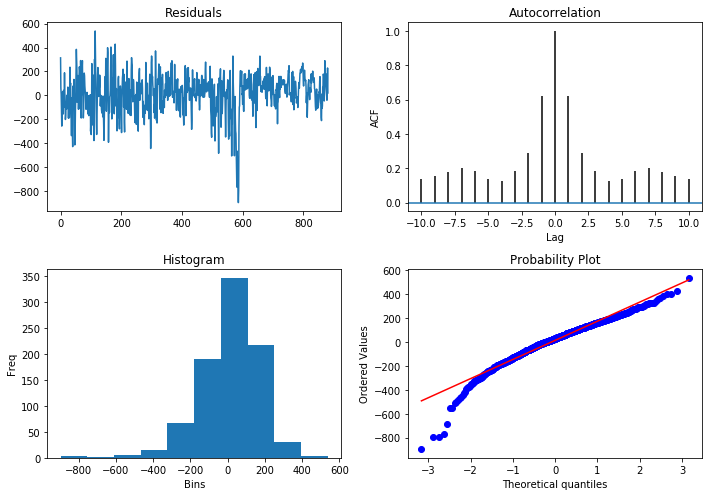

In [0]:
from pyFTS.benchmarks import ResidualAnalysis

ResidualAnalysis.single_plot_residuals(res1['TAIEX'],order=1)

In [0]:
from pyFTS.benchmarks import ResidualAnalysis

ljung_box_test = ResidualAnalysis.ljung_box_test(res2['TAIEX'],alpha=0.05)
ljung_box_test
#print(ljung_box_test.to_latex())

,Lag,Statistic,p-Value,Critical Value,Result
0,1,336.838522,0.0,3.841459,H0 accepted
1,2,394.472179,0.0,5.991465,H0 accepted
2,3,411.754344,0.0,7.814728,H0 accepted


## Samples

### Malaysia Eletric Load

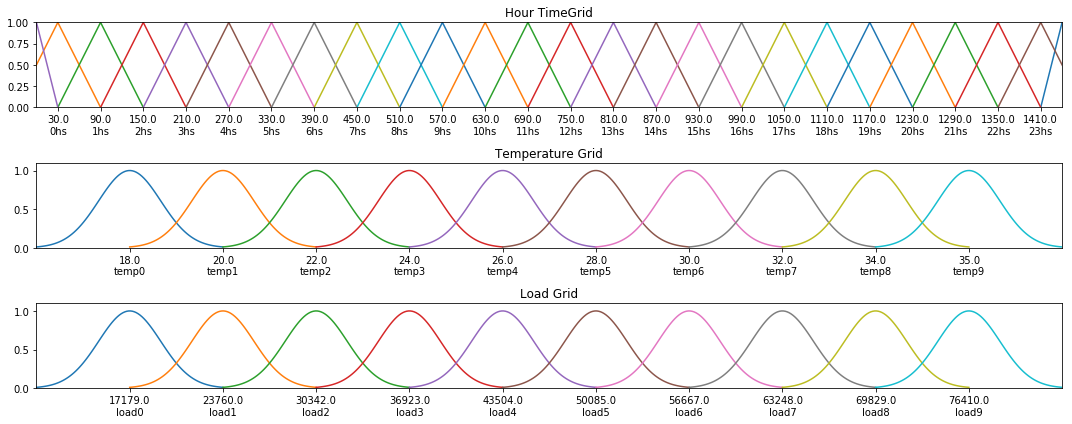

In [0]:
from pyFTS.data import Malaysia

df = Malaysia.get_dataframe()
df['time'] = pd.to_datetime(df["time"], format='%m/%d/%y %I:%M %p')

train_mv = df.iloc[:8000]
test_mv = df.iloc[8000:10000]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=[15,6])

sp = {'seasonality': DateTime.minute_of_day, 'names': [str(k)+'hs' for k in range(0,24)]}

vhour = variable.Variable("Hour", data_label="time", partitioner=seasonal.TimeGridPartitioner, npart=24,
                          data=train_mv, partitioner_specific=sp, alpha_cut=.3)

vhour.partitioner.plot(ax[0])

vtemp = variable.Variable("Temperature", data_label="temperature", alias='temp',
                         partitioner=Grid.GridPartitioner, npart=10, func=Membership.gaussmf,
                         data=train_mv, alpha_cut=.25)

vtemp.partitioner.plot(ax[1])

vload = variable.Variable("Load", data_label="load", alias='load',
                         partitioner=Grid.GridPartitioner, npart=10, func=Membership.gaussmf,
                         data=train_mv, alpha_cut=.25)

vload.partitioner.plot(ax[2])

plt.tight_layout()

model1 = mvfts.MVFTS(explanatory_variables=[vhour, vtemp, vload], target_variable=vload)
model1.fit(train_mv)

model2 = wmvfts.WeightedMVFTS(explanatory_variables=[vhour, vtemp, vload], target_variable=vload)
model2.fit(train_mv)


order = 1
knn = 2

model3 = granular.GranularWMVFTS(explanatory_variables=[vhour, vtemp, vload], target_variable=vload,
                                fts_method=pwfts.ProbabilisticWeightedFTS, fuzzyfy_mode='both',
                                order=order, knn=knn)

model3.fit(train_mv)

models = [model1, model2, model3]

colors=['orange','red','blue']


In [0]:
temp_generator = pwfts.ProbabilisticWeightedFTS(partitioner=vtemp.partitioner, order=1)
temp_generator.fit(train_mv['temperature'].values)

time_generator = lambda x : pd.to_datetime(x) + pd.to_timedelta(1, unit='h')

generators = {'time': time_generator, 'temperature': temp_generator}

horizon=100


#### One step ahead forecasting

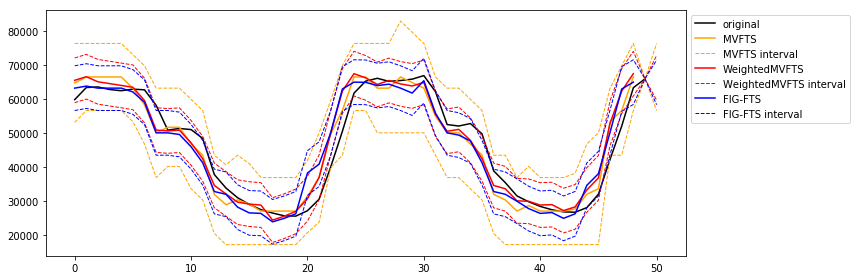

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12,4])

_rng = range(0,50)

ax.plot(test_mv['load'].values[_rng], color='black', label='original')

for ct,model in enumerate(models):
  forecasts = model.predict(test_mv.iloc[_rng], type='point')
  ax.plot(forecasts[:-1], color=colors[ct], label=model.shortname)
  forecasts = model.predict(test_mv.iloc[_rng], type='interval')
  cUtil.plot_interval2(forecasts, test_mv['load'].values[_rng], start_at=-1, ax=ax, 
                      color=colors[ct], ls='--', label=model.shortname + ' interval')
    
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

plt.tight_layout()

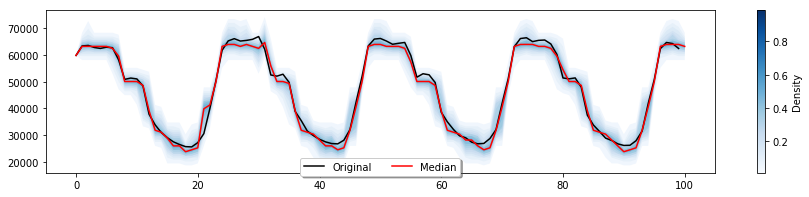

In [0]:
_rng = range(0,100)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,3])
ax.plot(test_mv['load'].values[_rng], color='black', label='Original')

forecasts = model3.predict(test_mv.iloc[_rng], type='distribution')

cUtil.plot_distribution2(forecasts, test_mv['load'].values[_rng], start_at=model3.order-1, ax=ax)

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))

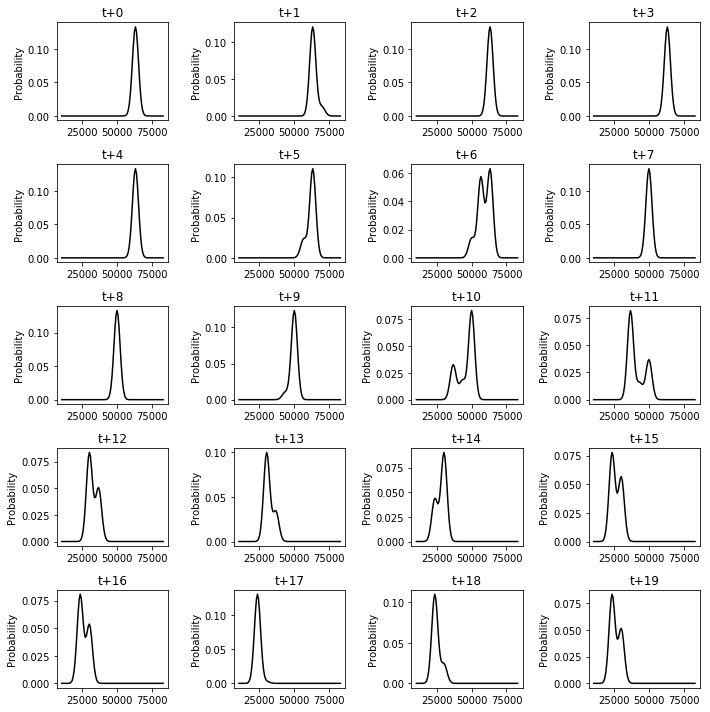

In [0]:
cUtil.plot_distribution_tiled(forecasts,rows=5,cols=4,size=[10,10])

#### Many steps ahead forecasting

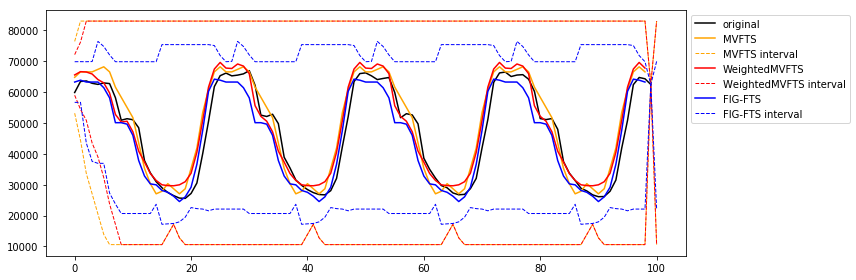

In [0]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12,4])

_rng = range(0,100)

ax.plot(test_mv['load'].values[_rng], color='black', label='original')

for ct,model in enumerate(models):
  forecasts = model.predict(test_mv.iloc[_rng], type='point', steps_ahead=100, generators=generators)
  ax.plot(forecasts[:-1], color=colors[ct], label=model.shortname)
  forecasts = model.predict(test_mv.iloc[_rng], type='interval', steps_ahead=100, generators=generators)
  cUtil.plot_interval2(forecasts, test_mv['load'].values[_rng], start_at=-1, ax=ax, 
                      color=colors[ct], ls='--', label=model.shortname + ' interval')
    
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

plt.tight_layout()

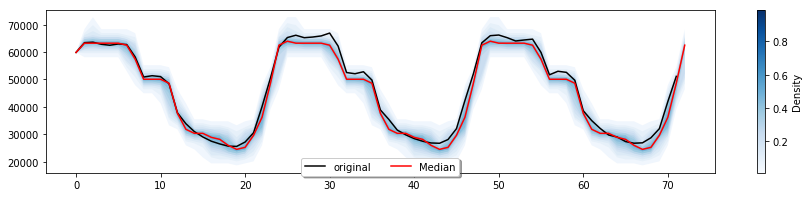

In [0]:
_rng = range(0,72)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,3])
ax.plot(test_mv['load'].values[_rng], color='black', label='original')

forecasts = model3.predict(test_mv.iloc[_rng], type='distribution', steps_ahead=72, generators=generators)

cUtil.plot_distribution2(forecasts, test_mv['load'].values[_rng], start_at=model3.order-1, ax=ax)

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))

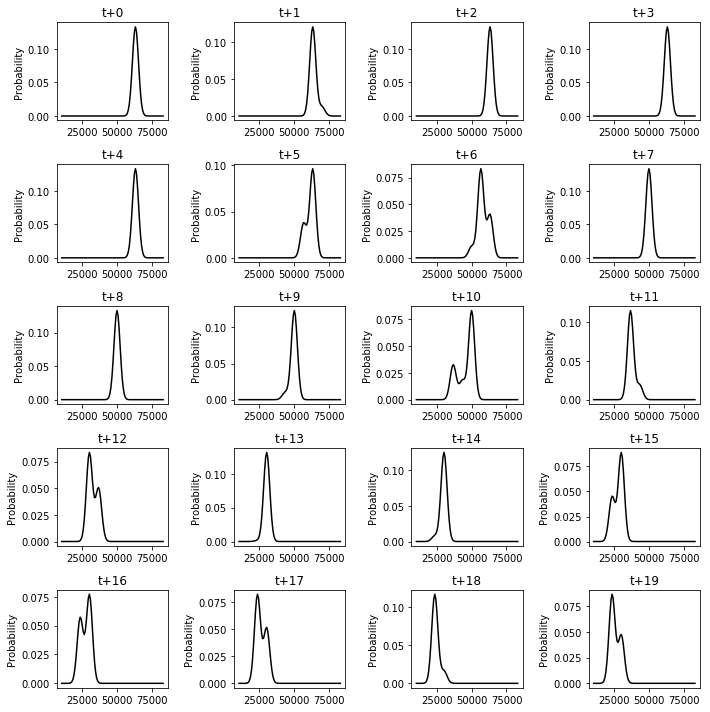

In [0]:
cUtil.plot_distribution_tiled(forecasts,rows=5,cols=4,size=[10,10])

### SONDA Solar Radiation

In [0]:
def sample_by_hour(data):
  return [np.nanmean(data[k:k+60]) for k in np.arange(0,len(data),60)]

def sample_date_by_hour(data):
  return [data[k] for k in np.arange(0,len(data),60)]

from pyFTS.data import SONDA

sonda = SONDA.get_dataframe()[['datahora','glo_avg','ws_10m']]

sonda = sonda.drop(sonda.index[np.where(sonda["ws_10m"] <= 0.01)])
sonda = sonda.drop(sonda.index[np.where(sonda["glo_avg"] <= 0.01)])
sonda = sonda.dropna()
sonda['datahora'] = pd.to_datetime(sonda["datahora"], format='%Y-%m-%d %H:%M:%S')


var = {
    'datahora': sample_date_by_hour(sonda['datahora'].values),
    'glo_avg': sample_by_hour(sonda['glo_avg'].values),
    'ws_10m': sample_by_hour(sonda['ws_10m'].values),
}

df = pd.DataFrame(var)


In [0]:
time_generator = lambda x : pd.to_datetime(x) + pd.to_timedelta(1, unit='h')

generators = {'datahora': time_generator}

horizon=100


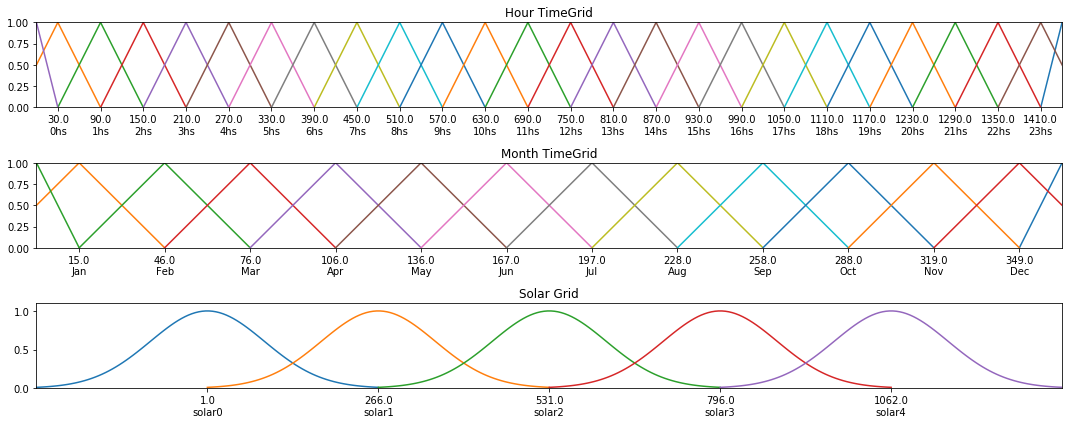

In [0]:
train_mv = df.iloc[:9000]
test_mv = df.iloc[9000:10000]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=[15,6])

sp1 = {'seasonality': DateTime.minute_of_day, 'names': [str(k)+'hs' for k in range(0,24)]}

vhour = variable.Variable("Hour", data_label="datahora", partitioner=seasonal.TimeGridPartitioner, npart=24,
                          data=train_mv, partitioner_specific=sp1, alpha_cut=.3)

vhour.partitioner.plot(ax[0])

sp2 = {'seasonality': DateTime.day_of_year, 'names': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']}

vmonth = variable.Variable("Month", data_label="datahora", partitioner=seasonal.TimeGridPartitioner, npart=12,
                          data=train_mv, partitioner_specific=sp2, alpha_cut=.3)

vmonth.partitioner.plot(ax[1])

vrad = variable.Variable("Solar", data_label="glo_avg", alias='solar',
                         partitioner=Grid.GridPartitioner, npart=5, func=Membership.gaussmf,
                         data=train_mv, alpha_cut=.25)

vrad.partitioner.plot(ax[2])

plt.tight_layout()

model1 = mvfts.MVFTS(explanatory_variables=[vhour, vmonth, vrad], target_variable=vrad)
model1.fit(train_mv)

model2 = wmvfts.WeightedMVFTS(explanatory_variables=[vhour, vmonth, vrad], target_variable=vrad)
model2.fit(train_mv)


order = 1
knn = 3

model3 = granular.GranularWMVFTS(explanatory_variables=[vhour, vmonth, vrad], target_variable=vrad,
                                fts_method=pwfts.ProbabilisticWeightedFTS, fuzzyfy_mode='both',
                                order=order, knn=knn)

model3.fit(train_mv)

models = [model1, model2, model3]

colors=['orange','red','blue']



#### One step ahead forecasting

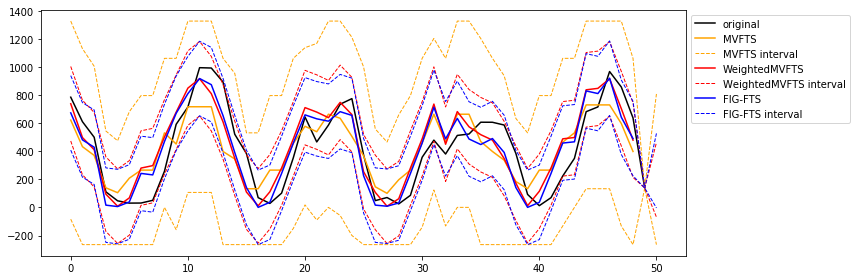

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12,4])

_rng = range(0,50)

ax.plot(test_mv['glo_avg'].values[_rng], color='black', label='original')

for ct,model in enumerate(models):
  forecasts = model.predict(test_mv.iloc[_rng], type='point')
  ax.plot(forecasts[:-1], color=colors[ct], label=model.shortname)
  forecasts = model.predict(test_mv.iloc[_rng], type='interval')
  cUtil.plot_interval2(forecasts, test_mv['glo_avg'].values[_rng], start_at=-1, ax=ax, 
                      color=colors[ct], ls='--', label=model.shortname + ' interval')
    
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

plt.tight_layout()

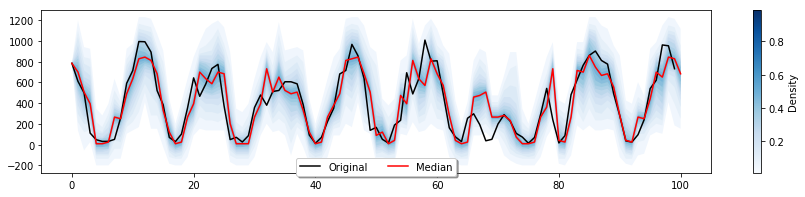

In [0]:
_rng = range(0,100)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,3])
ax.plot(test_mv['glo_avg'].values[_rng], color='black', label='Original')

forecasts = model3.predict(test_mv.iloc[_rng], type='distribution')

cUtil.plot_distribution2(forecasts, test_mv['glo_avg'].values[_rng], start_at=model3.order-1, ax=ax)

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))

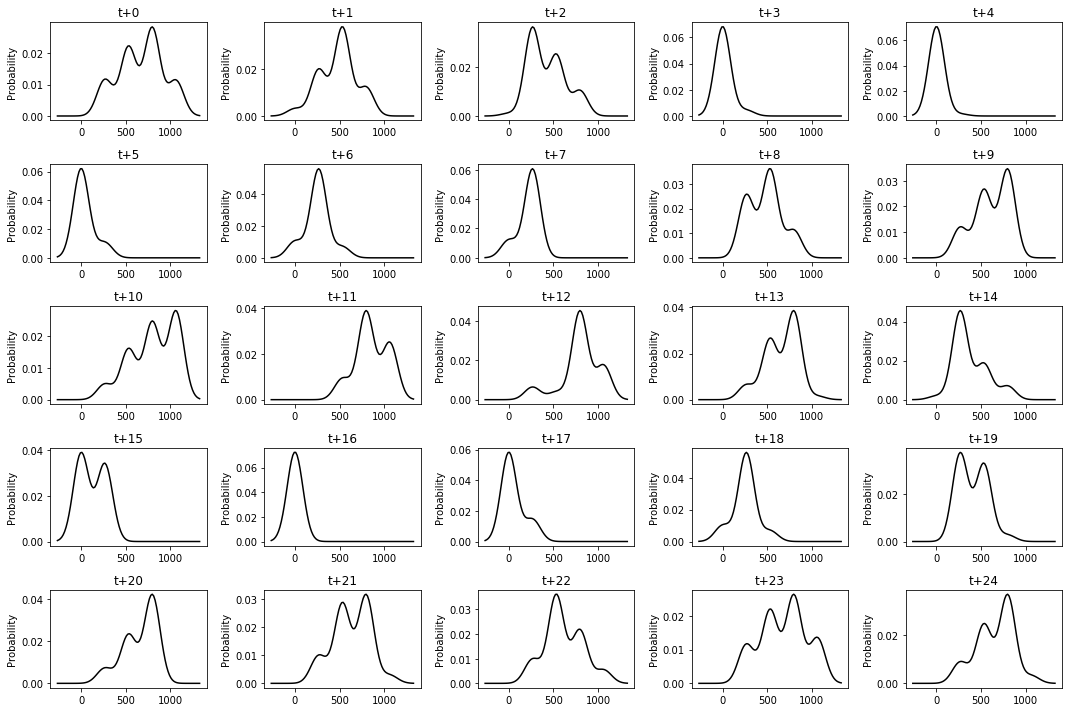

In [0]:
cUtil.plot_distribution_tiled(forecasts,rows=5,cols=5,size=[15,10])

#### Many steps ahead forecasting

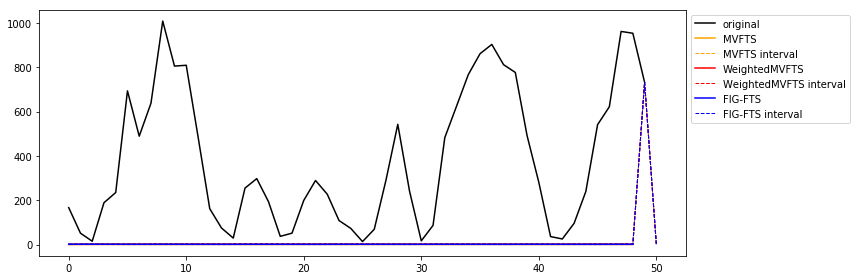

In [0]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12,4])

_rng = range(50,100)

ax.plot(test_mv['glo_avg'].values[_rng], color='black', label='original')

for ct,model in enumerate(models):
  forecasts = model.predict(test_mv.iloc[_rng], type='point', steps_ahead=50, generators=generators)
  ax.plot(forecasts[:-1], color=colors[ct], label=model.shortname)
  forecasts = model.predict(test_mv.iloc[_rng], type='interval', steps_ahead=50, generators=generators)
  cUtil.plot_interval2(forecasts, test_mv['glo_avg'].values[_rng], start_at=-1, ax=ax, 
                      color=colors[ct], ls='--', label=model.shortname + ' interval')
    
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

plt.tight_layout()

### SONDA Wind Speed

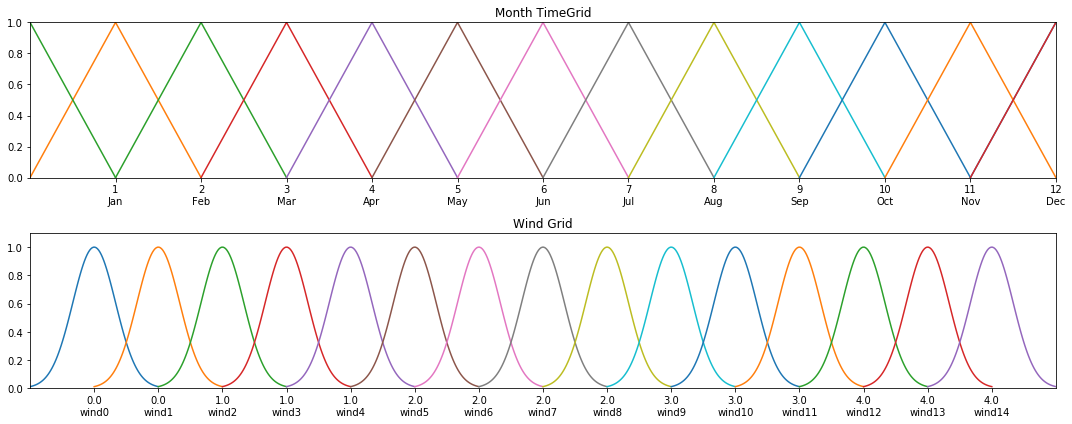

In [0]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[15,6])

sp = {'seasonality': DateTime.month, 'names': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']}

vmonth = variable.Variable("Month", data_label="datahora", partitioner=seasonal.TimeGridPartitioner, npart=12,
                          data=train_mv, partitioner_specific=sp, alpha_cut=.3)

vmonth.partitioner.plot(ax[0])

vwin = variable.Variable("Wind", data_label="ws_10m", alias='wind',
                         partitioner=Grid.GridPartitioner, npart=15, func=Membership.gaussmf,
                         data=train_mv, alpha_cut=.25)

vwin.partitioner.plot(ax[1])

plt.tight_layout()

model1 = mvfts.MVFTS(explanatory_variables=[vmonth, vwin], target_variable=vwin)
model1.fit(train_mv)

model2 = wmvfts.WeightedMVFTS(explanatory_variables=[vmonth, vwin], target_variable=vwin)
model2.fit(train_mv)

order = 3
knn = 2

model3 = granular.GranularWMVFTS(explanatory_variables=[vmonth, vwin], target_variable=vwin,
                                fts_method=pwfts.ProbabilisticWeightedFTS, fuzzyfy_mode='both',
                                order=order, knn=knn)

model3.fit(train_mv)

models = [model1, model2, model3]

colors=['orange','red','blue']


#### One step ahead forecasting

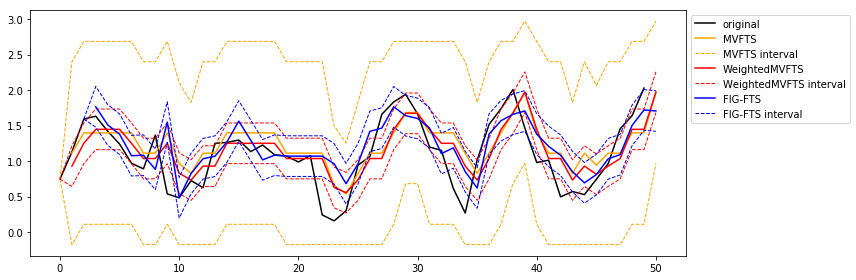

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12,4])

_rng = range(150,200)

ax.plot(test_mv['ws_10m'].values[_rng], color='black', label='original')

for ct,model in enumerate(models):
  forecasts = model.predict(test_mv.iloc[_rng], type='point')
  for k in np.arange(model.order):
    forecasts.insert(0,None)
  ax.plot(forecasts, color=colors[ct], label=model.shortname)
  forecasts = model.predict(test_mv.iloc[_rng], type='interval')
  cUtil.plot_interval2(forecasts, test_mv['ws_10m'].values[_rng], start_at=model.order-1, ax=ax, 
                      color=colors[ct], ls='--', label=model.shortname + ' interval')
    
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/pyFTS/models/pwfts.py:499: RuntimeWarning: invalid value encountered in double_scalars
  pf = np.nansum(num) / np.nansum(den)


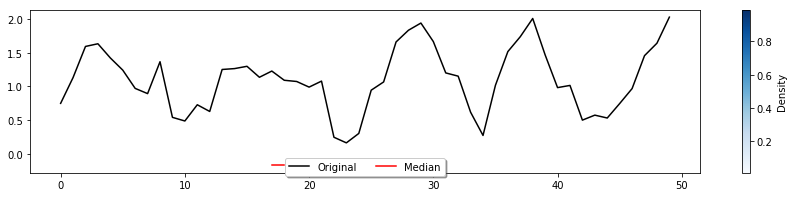

In [0]:
_rng = range(150,200)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,3])
ax.plot(test_mv['ws_10m'].values[_rng], color='black', label='Original')

forecasts = model3.predict(test_mv.iloc[_rng], type='distribution')

cUtil.plot_distribution2(forecasts, test_mv['ws_10m'].values[_rng], start_at=model3.order-1, ax=ax)

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))